In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.utils.extmath import cartesian

# Q1 : Simulated Annealing

In [3]:
NO_NODES=6

In [76]:
def generate_w():
    a = np.random.rand(NO_NODES, NO_NODES)
    w = np.tril(a) + np.tril(a, -1).T
    np.fill_diagonal(w,0)
    return w

def get_initial_state():
    a = np.array([-1]*NO_NODES)
    s = []
    for i in range(NO_NODES):
        s_i = -1
        if np.random.rand() >= 0.5:
            s_i = 1
        s.append(s_i)
    return np.array(s)

def compute_energy_cost(w,s):
    ss = np.dot(w,np.outer(s,s.T).T)
    return -np.trace(ss)/2

In [167]:
W_0 = generate_w()
S_0 = get_initial_state()
POSSIBLE_STATES = cartesian([(-1,1)]*NO_NODES)
COST_OF_STATES = np.array(list(map( lambda s: compute_energy_cost(W_0, s), POSSIBLE_STATES)))

In [216]:
def delta_cost(w, s_0, s_1):
    cost_s0 = compute_energy_cost(w,s_0)
    cost_s1 = compute_energy_cost(w,s_1)
    return cost_s1 - cost_s0

def simulated_annealing(w,s, m, beta, tou, t_max ):
    beta_basket = []
    energy_basket = []
    ps_basket = []
    optimal_state = s
    optimal_cost = compute_energy_cost(w,s)
    print("Initial cost : %f" % optimal_cost )

    for i in range(t_max):
        for j in range(m):
            node_i = np.random.choice(6)
            new_s = np.copy(s)
            new_s[node_i] = -new_s[node_i]
            

            cost_delta = delta_cost(w, s, new_s)
            flip_prob = 1/(1 + np.exp(beta*cost_delta))
            
            if np.random.rand() > flip_prob:
                s = new_s
                c = compute_energy_cost(w,s)
                if c < optimal_cost:
                  optimal_cost = c
                  optimal_state = s
                          
        cur_cost = compute_energy_cost(w,s)
        energy_basket.append(cur_cost)
        
        
        prob = np.exp(-beta*COST_OF_STATES)
        prob = prob / np.sum(prob)
        ps_basket.append(prob)
        
        beta = tou*beta
        beta_basket.append(beta)
  
    print("Final cost : %f at %s" % (optimal_cost, optimal_state ))
    return {'optimal_state': optimal_state, 'cost': optimal_cost, 'beta': beta_basket, 'energy': energy_basket, 'prob': ps_basket}
     
sa_result = simulated_annealing(W_0,S_0, m=1, beta=0.000001, tou=2, t_max=100)
#sa_result

Initial cost : 2.199751
Final cost : -1.447499 at [ 1 -1 -1 -1 -1 -1]


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in true_divide


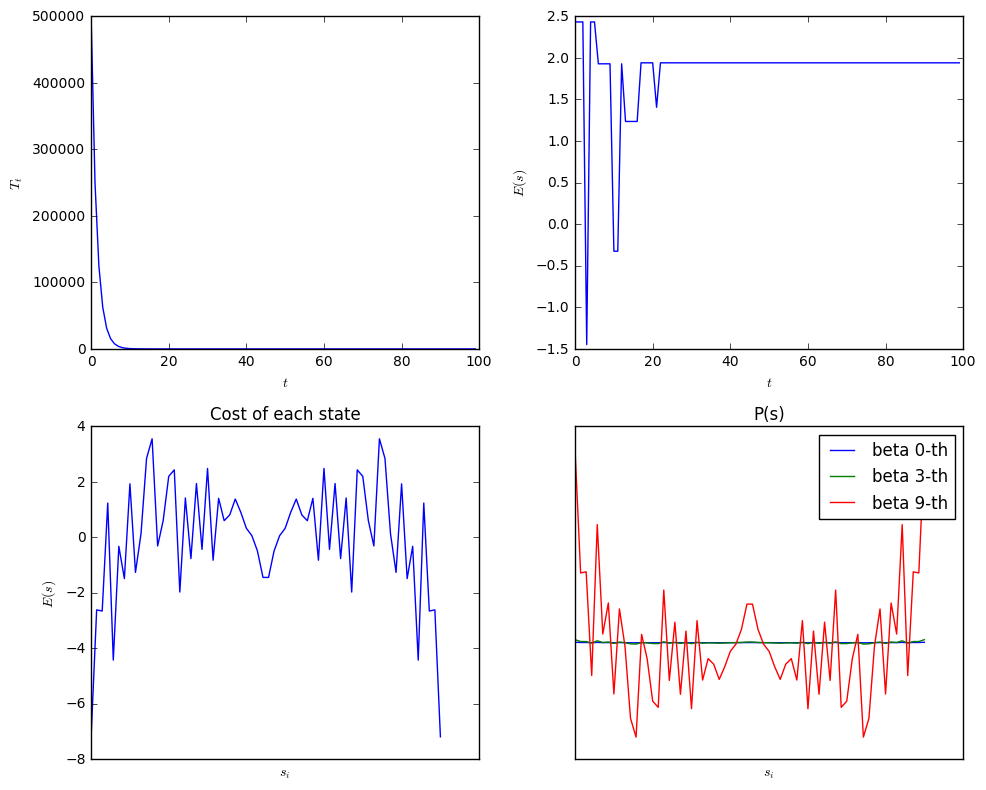

In [287]:
def plot_sa_result(res):
    rows = 4
    cols = 2
    plt.figure(figsize=(5*cols, 4*rows))
    plt.subplot(rows,cols, 1)
    plt.plot(1/np.array(res['beta']))
    plt.ylabel('$T_t$')
    plt.xlabel('$t$')
    
    plt.subplot(rows,cols, 2)
    plt.plot(res['energy'])
    plt.ylabel('$E(s)$')
    plt.xlabel('$t$')
    plt.tight_layout()
    
    plt.subplot(rows,cols, 3)
    plt.plot(COST_OF_STATES)
    plt.ylabel('$E(s)$')
    plt.xlabel('$s$')
    plt.title("Cost of each state")
    plt.xticks([])
    plt.xlabel('$s_i$')
    plt.tight_layout()
    
    plt.subplot(rows,cols, 4)
    
    for i in [0,3,9]:
        plt.plot(sa_result['prob'][i], label="beta %d-th"% (i) )
    plt.legend()
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('$s_i$')
    plt.title("P(s)")
    
plot_sa_result(sa_result)

# Q.2 Mean Field Annealing

In [289]:
def mean_field_annealing(w,s, beta, tou, t_max, epsilon=0.000001):
    beta_basket = []
    energy_basket = []

    optimal_state = s
    optimal_cost = compute_energy_cost(w,s)
    print("Initial cost : %f" % optimal_cost )
    
    for t_i in range(t_max):
        mean_fields = np.zeros(NO_NODES)
        while True:
            new_mean_fields = -np.dot(w,s)
            s = np.tanh(-beta*new_mean_fields)
            norm = np.linalg.norm(new_mean_fields - mean_fields)
            if norm < epsilon:
                break
            mean_fields = new_mean_fields
        
        energy_basket.append(compute_energy_cost(w,s))
        beta = tou*beta
        beta_basket.append(beta)
        
            
    optimal_cost = compute_energy_cost(w,s)
    print("Final cost : %f at %s" % (optimal_cost, s ))
    return {'optimal_state': s, 'cost': optimal_cost, 'beta': beta_basket, 'energy': energy_basket  }
     
mf_result = mean_field_annealing(W_0, S_0, beta=0.000001, tou=2, t_max=100)

Initial cost : 2.199751
Final cost : -7.198469 at [ 1.  1.  1.  1.  1.  1.]


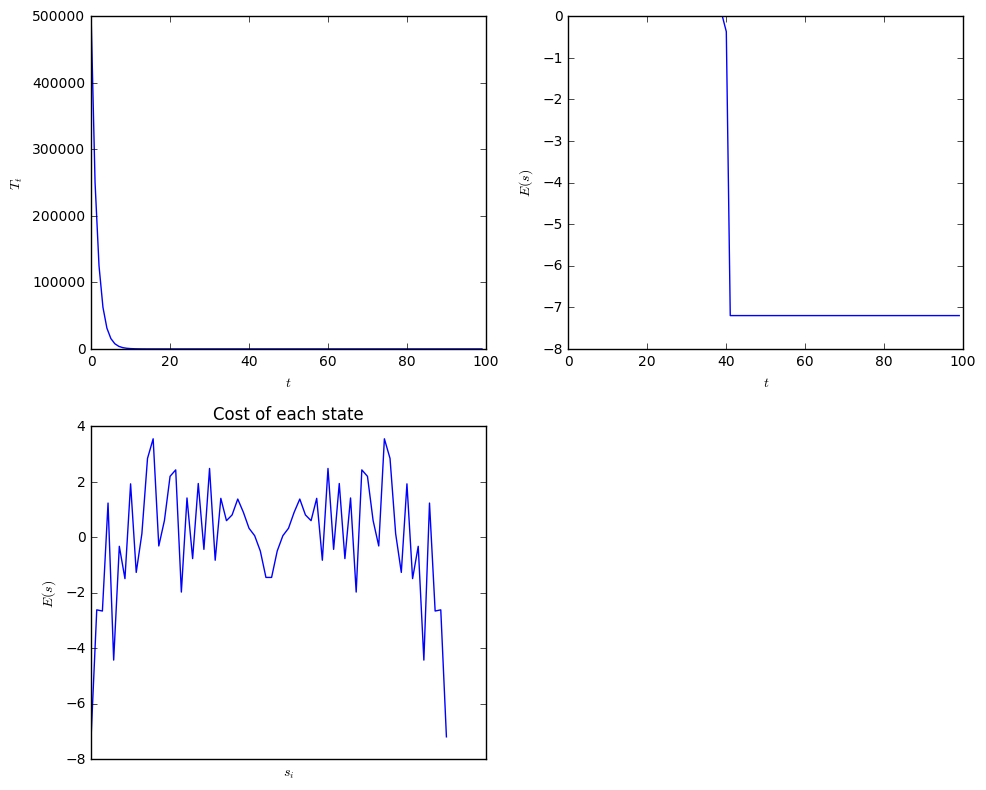

In [292]:
def plot_mfa_result(res):
    rows = 4
    cols = 2
    plt.figure(figsize=(5*cols, 4*rows))
    plt.subplot(rows,cols, 1)
    plt.plot(1/np.array(res['beta']))
    plt.ylabel('$T_t$')
    plt.xlabel('$t$')
    
    plt.subplot(rows,cols, 2)
    plt.plot(res['energy'])
    plt.ylabel('$E(s)$')
    plt.xlabel('$t$')
    plt.tight_layout()
    
    plt.subplot(rows,cols, 3)
    plt.plot(COST_OF_STATES)
    plt.ylabel('$E(s)$')
    plt.xlabel('$s$')
    plt.title("Cost of each state")
    plt.xticks([])
    plt.xlabel('$s_i$')
    plt.tight_layout()
        
plot_mfa_result(mf_result)

# Compare between Simulated Annealing and Mean-Field Annealing 